In [1]:
## Importing necessary Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [4]:
# This code reads in baby products data retrieved from: http://jmcauley.ucsd.edu/data/amazon/ 
#citation: "Image-based recommendations on styles and substitutes" J. McAuley, C. Targett, J. Shi, A. van den Hengel, SIGIR, 2015

Baby_Products = pd.read_json('C:/Users/Chauncey/Baby_5.json', lines=True)



In [6]:
## Exploring the dataset
Baby_Products.head(2)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,097293751X,"[0, 0]",5,Perfect for new parents. We were able to keep ...,"07 16, 2013",A1HK2FQW6KXQB2,"Amanda Johnsen ""Amanda E. Johnsen""",Awesine,1373932800
1,097293751X,"[0, 0]",5,This book is such a life saver. It has been s...,"06 29, 2013",A19K65VY14D13R,angela,Should be required for all new parents!,1372464000


In [7]:
## Counting the number of rows 
len(Baby_Products)

160792

In [8]:
## Exploring the data
Baby_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160792 entries, 0 to 160791
Data columns (total 9 columns):
asin              160792 non-null object
helpful           160792 non-null object
overall           160792 non-null int64
reviewText        160792 non-null object
reviewTime        160792 non-null object
reviewerID        160792 non-null object
reviewerName      159427 non-null object
summary           160792 non-null object
unixReviewTime    160792 non-null int64
dtypes: int64(2), object(7)
memory usage: 11.0+ MB


In [9]:
Baby_Products.describe()

,overall,unixReviewTime
count,160792.000000,1.607920e+05
mean,4.214115,1.350242e+09
std,1.144325,5.616114e+07
min,1.000000,9.824544e+08
25%,4.000000,1.331942e+09
50%,5.000000,1.365811e+09
75%,5.000000,1.386547e+09
max,5.000000,1.405987e+09


In [10]:
# Creating a new column which contains the number of words in the review column

Baby_Products['Review length'] = Baby_Products['reviewText'].apply(len)

In [11]:
sns.set_style('white')

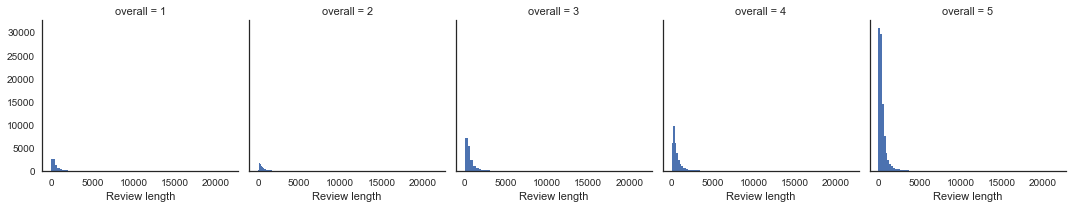

In [15]:
g = sns.FacetGrid(Baby_Products, col='overall')
g.map(plt.hist,'Review length', bins=65) # distributions similar but amounts skewed towards 3 4 and 5 stars 

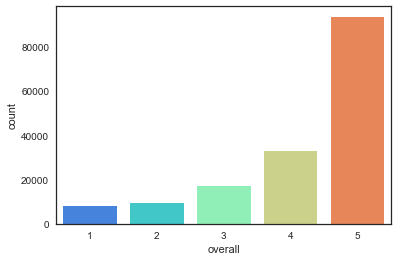

In [16]:
sns.countplot(x='overall', data=Baby_Products, palette='rainbow') ## Most reviews have an overall rating of 5 

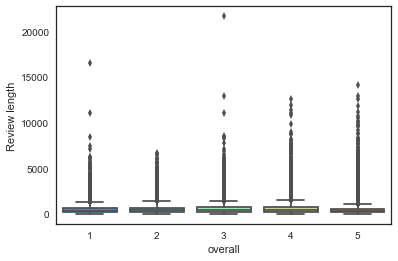

In [20]:
sns.boxplot(x='overall', y='Review length', data=Baby_Products, palette='rainbow') 
# 4 and 5 reviews appear to have longer review length but many outliers. This could cause some issues. 

In [21]:
Baby = Baby_Products.drop('unixReviewTime', axis=1)

In [22]:
Baby['helpful_count'] = Baby['helpful'].apply(lambda x: x[0])

In [24]:
Baby['overall_count'] = Baby['helpful'].apply(lambda x: x[1])

In [25]:
## Getting the mean values of the numerical columns 
stars = Baby.groupby('overall').mean()
stars

,Review length,helpful_count,overall_count
overall,,,
1,541.128533,2.937204,4.379205
2,574.858262,1.971609,2.742304
3,589.839003,2.080730,2.631121
4,602.717961,1.806237,2.113155
5,467.140357,1.593910,1.827877


In [26]:
stars.corr()

,Review length,helpful_count,overall_count
Review length,1.000000,0.139904,0.110355
helpful_count,0.139904,1.000000,0.991423
overall_count,0.110355,0.991423,1.000000


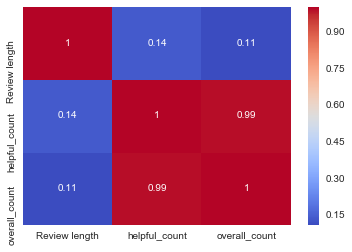

In [27]:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

In [38]:
## Eliminating rows with missing values 
Baby.dropna(inplace=True)
## Assuming a 3 rating is neutral, those ratings will be removed. 
Baby = Baby[Baby['overall']!=3]
## Creating a new column that will be the target for the model. 
Baby['Positively Rated'] = np.where(Baby['overall'] > 3, 1, 0)
Baby.head(5)
## Selecting only 1 or 5 star reviews 
##Baby_class = Baby[(Baby['overall']==1) | (Baby['overall']==5)]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,Review length,helpful_count,overall_count,Positively Rated
0,097293751X,"[0, 0]",5,Perfect for new parents. We were able to keep ...,"07 16, 2013",A1HK2FQW6KXQB2,"Amanda Johnsen ""Amanda E. Johnsen""",Awesine,253,0,0,1
1,097293751X,"[0, 0]",5,This book is such a life saver. It has been s...,"06 29, 2013",A19K65VY14D13R,angela,Should be required for all new parents!,556,0,0,1
2,097293751X,"[0, 0]",5,Helps me know exactly how my babies day has go...,"03 19, 2014",A2LL1TGG90977E,Carter,Grandmother watching baby,227,0,0,1
3,097293751X,"[0, 0]",5,I bought this a few times for my older son and...,"08 17, 2013",A5G19RYX8599E,cfpurplerose,repeat buyer,828,0,0,1
4,097293751X,"[0, 0]",4,I wanted an alternative to printing out daily ...,"04 1, 2014",A2496A4EWMLQ7,C. Jeter,Great,371,0,0,1


In [40]:
Baby['Positively Rated'].mean() ## looking at the mean we can deduce that we have impbalanced classes. 

0.8809952206915941

In [37]:
Baby.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159427 entries, 0 to 160791
Data columns (total 11 columns):
asin             159427 non-null object
helpful          159427 non-null object
overall          159427 non-null int64
reviewText       159427 non-null object
reviewTime       159427 non-null object
reviewerID       159427 non-null object
reviewerName     159427 non-null object
summary          159427 non-null object
Review length    159427 non-null int64
helpful_count    159427 non-null int64
overall_count    159427 non-null int64
dtypes: int64(4), object(7)
memory usage: 14.6+ MB


In [50]:
## Splitting our data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Baby['reviewText'], Baby['Positively Rated'], random_state=0)

In [97]:
print('X_train first entry:\n\n', X_train[1])
print('\n\nX_train shape: ', X_train.shape)  

X_train first entry:

 This book is such a life saver.  It has been so helpful to be able to go back to track trends, answer pediatrician questions, or communicate with each other when you are up at different times of the night with a newborn.  I think it is one of those things that everyone should be required to have before they leave the hospital.  We went through all the pages of the newborn version, then moved to the infant version, and will finish up the second infant book (third total) right as our baby turns 1.  See other things that are must haves for baby at [...]


X_train shape:  (106710,)


In [61]:
## Converting to a numeric representation that scikit learn can use. 
##This is done by using a bag of words approach which is a commonly used way to represent text for use in machine learning 
## It counts how often each word occurs and ignores structure. CountVectorizer allows us to use the bag of words approach by 
## converting a collection of text documents into a matrix of token counts 
## Providing the CountVectorizer with actual instances/examples from the training data. CountVectorizer tokenizes the training 
## data and builds the vocabulary
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer().fit(X_train)


In [62]:
## Getting the vocabulary by looking at every 2000th feature 

vect.get_feature_names()[::2000]

['00',
 '8weeks',
 'app',
 'beams',
 'buckleshusband',
 'clamping',
 'coscto',
 'developement',
 'educating',
 'feedingeasy',
 'generate',
 'her4',
 'intensified',
 'leftover',
 'mediocre',
 'neverfull',
 'overtops',
 'pokes',
 'raft',
 'rivers',
 'shouldered',
 'spons',
 'suspender',
 'tirestray',
 'unorganic',
 'wetness']

In [64]:
len(vect.get_feature_names())

51444

In [65]:
## Transforming the documents in X_train to a document term matrix giving the bag of words representation of X_train
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<106710x51444 sparse matrix of type '<class 'numpy.int64'>'
	with 6609052 stored elements in Compressed Sparse Row format>

In [66]:
## Using X_train_vectorized to train a logistic regression model. 
## Logistic Regression was used because it works well with high dimentional sparse data 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
## making predicitions and computing the area under the curve score 
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC:', roc_auc_score(y_test, predictions))


AUC: 0.802005832803


In [73]:
## looking at the coefficients from our model sorting for the 10 largest and 10 smallest

feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]])) ## Negative reviews 
print('Largest Coefs:\n{}'.format(feature_names[sorted_coef_index[:-11:-1]])) ## Positive reviews 

Smallest Coefs:
['poorly' 'theory' 'disappointing' 'disappointment' 'worst' 'unusable'
 'hopes' 'disappointed' 'returned' 'useless']

Largest Coefs:
['complaint' 'penny' 'satisfied' 'sooner' 'glad' 'excellent' 'gripe'
 'skeptical' 'awesome' 'lifesaver']


In [75]:
## Using TFIDF to rescale features to weight terms based on how important they are to the document. 
## High weights are given to terms that appear often in particular documents but not in the whole corpus
from sklearn.feature_extraction.text import TfidfVectorizer
## To limit overfitting, min_df removes any words that appear in fewer than 5 documents. 
vect = TfidfVectorizer(min_df=5).fit(X_train)  
len(vect.get_feature_names()) 

16449

In [76]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
print('AUC:', roc_auc_score(y_test, predictions)) ## a slightly lower score was achieved however with far fewer features 

AUC: 0.765293731911


In [77]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]])) ## commonly appeared acorss all reviews/
## only appeared rarely in very long reviews
print('Largest tfidf:\n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]])) 
## words which appeared frequently in a review but did not appear commonly across all reviews 

Smallest tfidf:
['stealthfit' 'optionalbaby' 'technicians' 'opus' 'remake' 'lw2450'
 'statistics' 'prospective' 'wimp' 'similarities']

Largest tfidf:
['perfect' 'practically' 'love' 'uncomfortable' 'useless' 'beautifull' 'ok'
 'helps' 'nice' 'quack']


In [78]:
## looking at the coefficients from our new model sorting for the 10 largest and 10 smallest

feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]])) ## Negative reviews 
print('Largest Coefs:\n{}'.format(feature_names[sorted_coef_index[:-11:-1]])) ## Positive reviews 

Smallest Coefs:
['not' 'disappointed' 'returned' 'useless' 'waste' 'return' 'idea' 'worst'
 'disappointing' 'returning']

Largest Coefs:
['great' 'love' 'easy' 'perfect' 'loves' 'best' 'perfectly' 'happy'
 'highly' 'little']


In [79]:
## Since word order is not accounted for, the model makes this prediction error
print(model.predict(vect.transform(['not an issue, product is working', 'an issue, product is not working'])))

[0 0]


In [81]:
## to address the above error some context is added by using n-grams 
vect = CountVectorizer (min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

198061

In [82]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
print('AUC:', roc_auc_score(y_test, predictions)) ## We able to improve our AUC score

AUC: 0.850842894955


In [83]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]])) ## Negative reviews 
print('Largest Coefs:\n{}'.format(feature_names[sorted_coef_index[:-11:-1]])) ## Positive reviews 

Smallest Coefs:
['not worth' 'not recommend' 'two stars' 'disappointing' 'disappointed'
 'useless' 'returned' 'not buy' 'very disappointed' 'poorly']

Largest Coefs:
['not too' 'excellent' 'perfect' 'would buy' 'awesome' 'perfectly'
 'better than' 'great' 'my only' 'glad']


In [158]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X_train_vectorized, y_train, cv=5)

In [159]:
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.948
